Checklist de Projeto

1.	Abordar o problema e analisar o panorama geral
2.	Obter os dados
3.	Explorar os dados para obter informações úteis
4.	Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina
5.	Explorar muitos modelos diferentes e selecionar os melhores
6.	Aperfeiçoar os modelos e os combinar em uma situação ideal
7.	Apresentar sua solução
8.	Implementar, monitorar e fazer a manutenção do seu sistema


O problema consiste em encontrar um modelo que seja capaz de prever os preços de casas na região de King County em Washington
a partir dos atributos presentes no dataset.
Para tal, será usado um método de aprendizado supervisionado por regressão. Como o dataset não é tão grande o método utilizado
será de aprendizado por batch.
O desempenho do modelo será medido através da verificação dos valores da função de custo, buscando minimizar esta (RMSE e MAE).

O Notebook em questão apresentará o preprocessamento dos dados até que eles possam ser utilizados em um algoritmo de Machine Learning, bem como a utilização de diferentes algoritmos buscando os que possuem melhor desempenho. Uma vez encontrado um algoritmo mais promissor, usaremos GridSearch e RandomizedSearch para encontrar os melhores hiperparâmetros deste algoritmo.

Este Notebook foi desenvolvido tendo como base o passo-a-passo do livro "Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow" e o Dataset utilizado pode ser encontrado no site do Kaggle: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/code?datasetId=128&sortBy=voteCount


In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("Display.max_columns", 21)

In [198]:
data = pd.read_csv(r"C:\Users\Pichau Gamer\Desktop\DS\Portfolio\KC Houses\kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [200]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


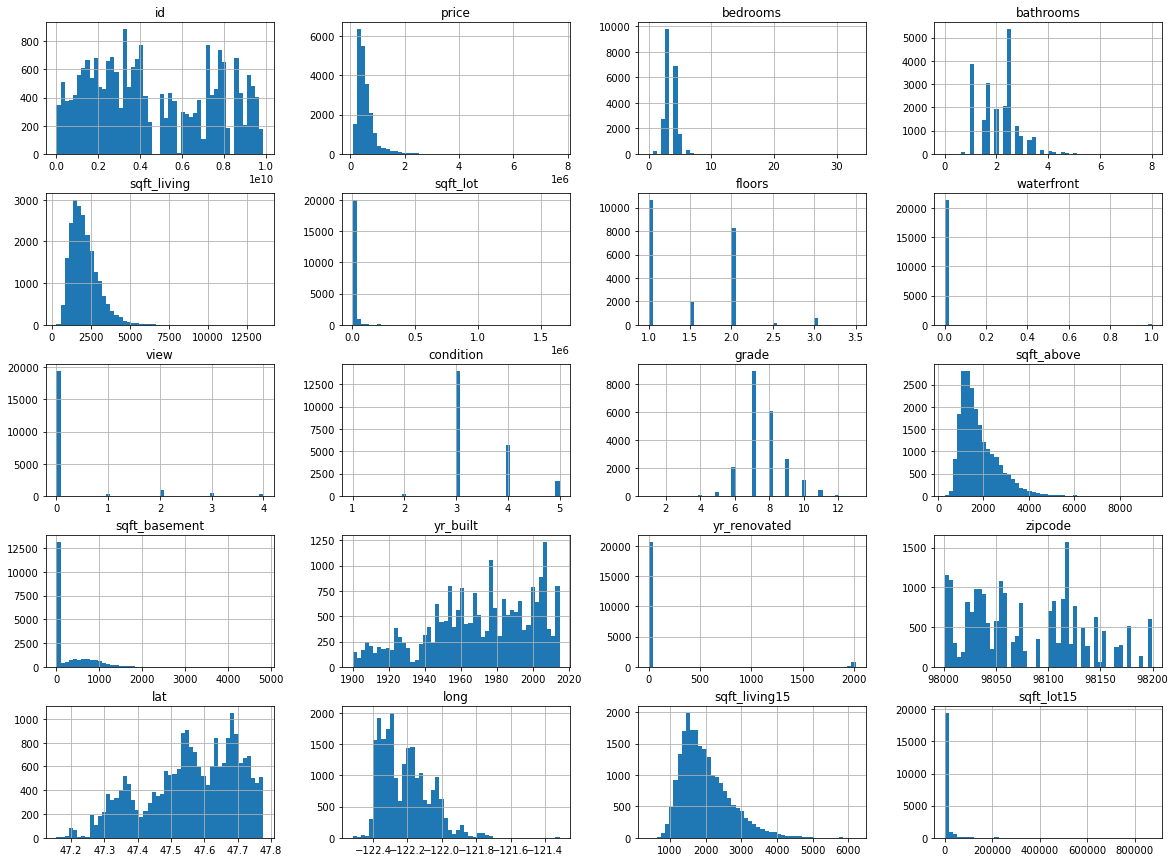

In [201]:
# Checa as distribuições para cada variável numérica num histograma.

%matplotlib inline 
data.hist(bins=50, figsize=(20,15))
plt.show()

In [202]:
# Separando dados de teste

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

17290
4323


In [203]:
test_set.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
16218,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
19964,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


Para manter proporções similares entre o conjunto de teste e de treino, nós iremos assumir que o atributo "sqft_living" seja
um dos principais na hora de definir o preço da casa e portanto faremos uma divisão estratificada dos dois conjuntos com base neste atributo.

<AxesSubplot:>

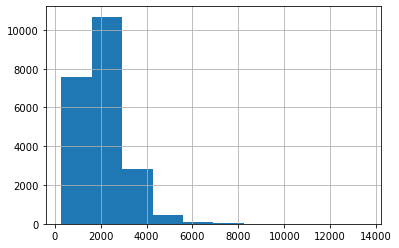

In [204]:
data['sqft_living'].hist()

In [205]:
# Criando uma variável categórica para agrupar os valores de sqft_living.
data['sqft_cat'] = pd.cut(data['sqft_living'],
                         bins=[0., 1000, 2000, 3000, 4000, np.inf],
                         labels=[1, 2, 3, 4, 5])

In [206]:
data['sqft_cat'].value_counts()

2    10218
3     6819
4     2299
1     1494
5      783
Name: sqft_cat, dtype: int64

<AxesSubplot:>

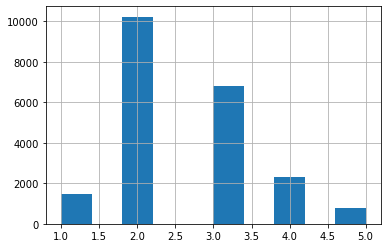

In [207]:
data['sqft_cat'].hist()

In [208]:
# Agora podemos fazer uma amostragem estratificada
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['sqft_cat']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [209]:
# Verificando a resultado da estratificação
strat_test_set["sqft_cat"].value_counts()/len(strat_test_set)

2    0.472820
3    0.315522
4    0.106408
1    0.069165
5    0.036086
Name: sqft_cat, dtype: float64

In [210]:
data["sqft_cat"].value_counts()/len(data)

2    0.472771
3    0.315505
4    0.106371
1    0.069125
5    0.036228
Name: sqft_cat, dtype: float64

In [211]:
def sqft_cat_proportions(data_used):
    return data_used["sqft_cat"].value_counts()/len(data_used)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": sqft_cat_proportions(data),
    "Stratified": sqft_cat_proportions(strat_test_set),
    "Random": sqft_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100*compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100*compare_props["Stratified"] / compare_props["Overall"] -100

In [212]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.069125,0.069165,0.065232,-5.631223,0.057675
2,0.472771,0.472820,0.470044,-0.576826,0.010319
3,0.315505,0.315522,0.318297,0.885224,0.005411
4,0.106371,0.106408,0.105020,-1.270554,0.034240
5,0.036228,0.036086,0.041406,14.293383,-0.392359


In [213]:
# removendo a feature income_cat
for set_ in (strat_train_set, strat_test_set):
    set_.drop("sqft_cat", axis=1, inplace=True)

In [214]:
house_df = strat_train_set.copy()
print(len(house_df))

17290


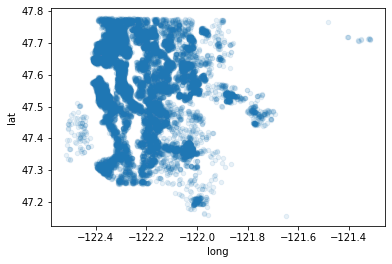

In [215]:
# visualizando o diagrama a partir das informações geográficas (latitude e longitude)
house_df.plot(kind="scatter", x="long", y="lat", alpha=0.1)
plt.show()

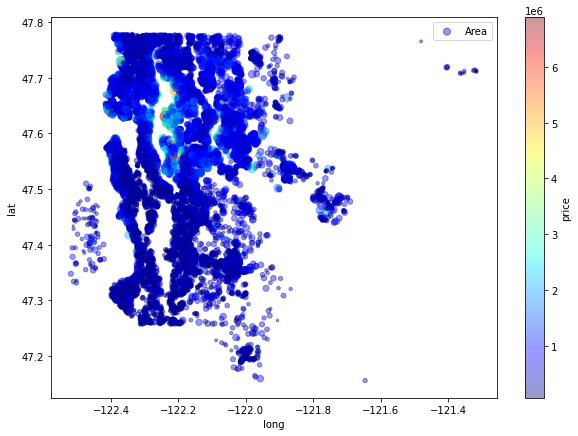

In [216]:
house_df.plot(kind="scatter", x="long", y="lat", alpha=0.4,
             s=house_df["sqft_living"]/100, label="Area", figsize=(10,7),
             c="price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

## Matriz de Correlações

In [217]:
corr_matrix = house_df.corr()

In [218]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701775
grade            0.674233
sqft_above       0.605138
sqft_living15    0.589198
bathrooms        0.524423
view             0.391473
sqft_basement    0.320217
bedrooms         0.308481
lat              0.308047
waterfront       0.260134
floors           0.259674
yr_renovated     0.113914
sqft_lot         0.091348
sqft_lot15       0.088732
yr_built         0.060392
condition        0.037335
long             0.025021
id              -0.012435
zipcode         -0.058326
Name: price, dtype: float64

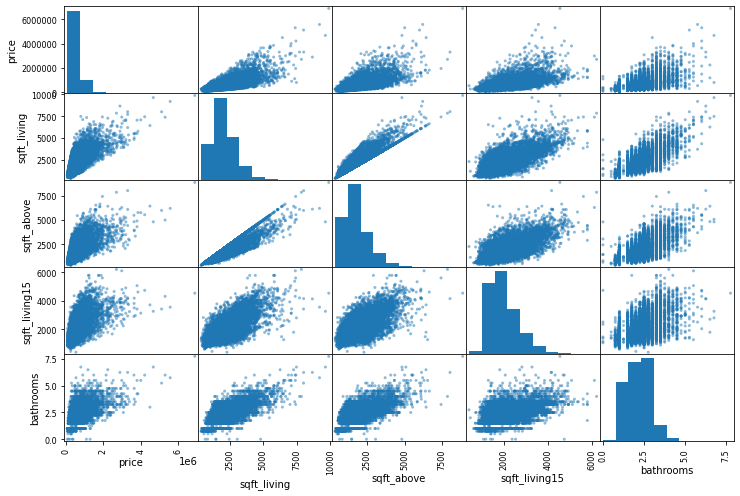

In [219]:
# Plottando matrizes de dispersão com os atributos numéricos mais promissores (sqft_living, sqft_above, sqft_living15 e bathrooms)

from pandas.plotting import scatter_matrix

attributes = ["price", "sqft_living", "sqft_above", "sqft_living15", "bathrooms"]
scatter_matrix(house_df[attributes], figsize=(12,8))
plt.show()

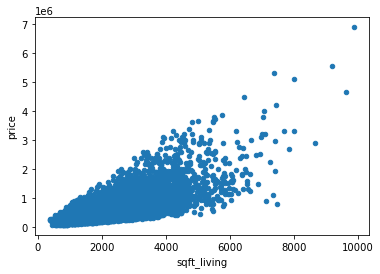

In [220]:
house_df.plot(kind="scatter", x="sqft_living", y="price")
plt.show()

## Combinações de atributos

Testaremos a criação de novos atributos a partir dos que já temos:

graded_area = combinação de sqft_living com grade, as duas variáveis que tiveram maior índice de correlação

lot_pctg_built = percentual do terreno construído. obs: pode ser maior do que 1 se o imóvel tiver mais de um andar.

yrs_since_last_renov = tempo passado desde a última reforma (ou idade do imóvel se nunca foi reformado)

In [221]:
house_df["graded_area"] = house_df["sqft_living"]*house_df["grade"]
house_df["lot_pctg_built"] = house_df["sqft_living"]/house_df["sqft_lot"]

In [222]:
yrs_since_last_renov = []
for value1, value2 in zip(house_df["yr_renovated"], house_df["yr_built"]):
    if value1 != 0:
        yrs_since_last_renov.append(2015 - value1)
    else:
        yrs_since_last_renov.append(2015 - value2)

house_df["yrs_since_last_renov"] = yrs_since_last_renov

In [223]:
corr_matrix = house_df.corr()
corr_matrix["price"].sort_values(ascending=False)

price                   1.000000
graded_area             0.756358
sqft_living             0.701775
grade                   0.674233
sqft_above              0.605138
sqft_living15           0.589198
bathrooms               0.524423
view                    0.391473
sqft_basement           0.320217
bedrooms                0.308481
lat                     0.308047
waterfront              0.260134
floors                  0.259674
lot_pctg_built          0.121342
yr_renovated            0.113914
sqft_lot                0.091348
sqft_lot15              0.088732
yr_built                0.060392
condition               0.037335
long                    0.025021
id                     -0.012435
zipcode                -0.058326
yrs_since_last_renov   -0.106793
Name: price, dtype: float64

Podemos notar que o novo atributo "graded_area" obteve um valor de correlação linear ainda maior do que os demais com o preço. 
Já o atributo "yrs_since_last_renov" mostrou ter uma pequena correlação negativa com o preço do imóvel, o que era esperado.

In [224]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'graded_area',
       'lot_pctg_built', 'yrs_since_last_renov'],
      dtype='object')

## Preparando os dados para o Algoritmo de Machine Learning

In [225]:
house_ml = house_df.drop(["id", "date", "price"], axis=1) # dropando a coluna label e as colunas id e data
house_ml_labels = house_df['price'].copy()


In [226]:
house_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 20474 to 1941
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bedrooms              17290 non-null  int64  
 1   bathrooms             17290 non-null  float64
 2   sqft_living           17290 non-null  int64  
 3   sqft_lot              17290 non-null  int64  
 4   floors                17290 non-null  float64
 5   waterfront            17290 non-null  int64  
 6   view                  17290 non-null  int64  
 7   condition             17290 non-null  int64  
 8   grade                 17290 non-null  int64  
 9   sqft_above            17290 non-null  int64  
 10  sqft_basement         17290 non-null  int64  
 11  yr_built              17290 non-null  int64  
 12  yr_renovated          17290 non-null  int64  
 13  zipcode               17290 non-null  int64  
 14  lat                   17290 non-null  float64
 15  long            

Iremos criar um pipeline para o preprocessamento dos dados. Neste caso o pipeline irá conter apenas o StandardScaler, visto que o objetivo principal é conseguir fazer um pipeline funcional.

Como todas as colunas do dataset são numéricas não se faz necessário criar um pipeline para atributos categóricos.

In [227]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # usando standard scaler ao invés de min-max scaler por conta dos outliers

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

house_ml_prepared = num_pipeline.fit_transform(house_ml)

In [228]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(house_ml_prepared, house_ml_labels)

LinearRegression()

In [229]:
# testando nosso algoritmo com algumas instâncias
some_data = house_ml.iloc[:5]
some_labels = house_ml_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 546091.09618539  220497.81032885 1177847.23910777  231823.41093573
  402830.81489998]
Labels: [379000.0, 173000.0, 1393000.0, 390000.0, 440500.0]


In [232]:
# Calculando o RMSE deste modelo de regressão
from sklearn.metrics import mean_squared_error
house_predictions = lin_reg.predict(house_ml_prepared)
lin_rmse = mean_squared_error(house_ml_labels, house_predictions, squared=False)

print("Root Mean Squared Error para Regressão Linear:", lin_rmse)

Root Mean Squared Error para Regressão Linear: 182650.81826232994


In [233]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(house_ml_labels, house_predictions)
lin_mae

116179.31259452071

In [234]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(house_ml_prepared, house_ml_labels)

DecisionTreeRegressor(random_state=42)

In [237]:
house_predictions = tree_reg.predict(house_ml_prepared)
tree_rmse = mean_squared_error(house_ml_labels, house_predictions, squared=False)

print("Root Mean Squared Error para Regressão com Árvores de Decisão:", tree_rmse)


Root Mean Squared Error para Regressão com Árvores de Decisão: 9724.541675960358


In [238]:
tree_mae = mean_absolute_error(house_ml_labels, house_predictions)
tree_mae

875.4366107576634

Parece muito provável que o modelo esteja sofrendo de Overfitting, visto que o erro foi muito baixo. Para confirmar a hipótese,
iremos realizar a validação cruzada nos dados de treino.

## Melhor avaliação usando Cross-Validation

## Decision Tree Regressor

In [239]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, house_ml_prepared, house_ml_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [181847.16989938 167109.39030624 178361.69479283 161602.69164335
 170575.86247921 178462.60294264 161236.35530681 182422.71107697
 184309.52313467 174789.1662905 ]
Mean: 174071.71678726032
Standard deviation: 8087.806016372696


## Linear Regression

In [240]:
lin_scores = cross_val_score(lin_reg, house_ml_prepared, house_ml_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [176783.51128383 186941.60550974 207749.00826159 165220.80977301
 175144.41580763 183928.38379321 175352.96700845 191771.8118694
 184136.4476014  183783.65885521]
Mean: 183081.2619763458
Standard deviation: 10874.867800547065


## Random Forest Regressor

In [241]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(house_ml_prepared, house_ml_labels)

house_predictions = forest_reg.predict(house_ml_prepared)
forest_rmse = mean_squared_error(house_ml_labels, house_predictions, squared=False)

print("RMSE para o conjunto de treinamento:", forest_rmse)



RMSE para o conjunto de treinamento: 47711.51727561974


In [242]:
forest_scores = cross_val_score(forest_reg, house_ml_prepared, house_ml_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [115537.06151232 122575.96397642 132001.52882884 114783.01146873
 137197.6215743  137291.03765134 116413.2325536  134935.15588672
 129703.62046765 128611.15807364]
Mean: 126904.93919935632
Standard deviation: 8485.278233193227


Podemos perceber que o Random Forest Regressor foi o algoritmo que teve o melhor desempenho até o momento, porém pela diferença
entre os Scores do conjunto de treinamento e da validação cruzada, conseguimos inferir que ele ainda está sofrendo de Overfitting.

## Support Vector Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

param_grid = [
    {'kernel': ['linear'], 'C': [10, 30, 100, 300, 1000, 3000, 10000, 30000]},
    {'kernel': ['rbf'], 'C': [10, 30, 100, 300, 1000, 3000, 10000, 30000],
    'gamma': [0.01, 0.1, 1.0, 3.0]}]

svm_reg = SVR()
random_search = RandomizedSearchCV(svm_reg, param_grid, n_iter = 50, cv=5,
                              scoring='neg_mean_squared_error', n_jobs=-1)

#random_search.fit(house_ml_prepared, house_ml_labels)


## Aperfeiçoando o Modelo de Random Forests

In [254]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # testar combinações de hiperparâmetros
    {'n_estimators': [100, 150], 'max_features': [10, 12]},
    # depois settar o bootstrap para falso e testar mais combinações
    {'bootstrap': [False], 'n_estimators': [100, 150], 'max_features': [10, 12, 14]},
]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(house_ml_prepared, house_ml_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [10, 12], 'n_estimators': [100, 150]},
                         {'bootstrap': [False], 'max_features': [10, 12, 14],
                          'n_estimators': [100, 150]}],
             return_train_score=True, scoring='neg_mean_squared_error')

A melhor combinação de hiperparâmetros:

In [255]:
grid_search.best_params_

{'max_features': 12, 'n_estimators': 150}

In [256]:
grid_search.best_estimator_

RandomForestRegressor(max_features=12, n_estimators=150, random_state=42)

Observando o score de cada uma das combinações de hiperparâmetros testados durante o grid search:

In [257]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

127623.84263089836 {'max_features': 10, 'n_estimators': 100}
127569.70876603496 {'max_features': 10, 'n_estimators': 150}
127111.34061375189 {'max_features': 12, 'n_estimators': 100}
126759.21855575801 {'max_features': 12, 'n_estimators': 150}
129213.95303458959 {'bootstrap': False, 'max_features': 10, 'n_estimators': 100}
128695.41994259392 {'bootstrap': False, 'max_features': 10, 'n_estimators': 150}
129931.50426851992 {'bootstrap': False, 'max_features': 12, 'n_estimators': 100}
129379.47285069156 {'bootstrap': False, 'max_features': 12, 'n_estimators': 150}
131508.10454228034 {'bootstrap': False, 'max_features': 14, 'n_estimators': 100}
131297.09322370414 {'bootstrap': False, 'max_features': 14, 'n_estimators': 150}


In [258]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.00287307, 0.0108002 , 0.10427403, 0.01017009, 0.00202292,
       0.02496737, 0.01379493, 0.00286635, 0.11317969, 0.01908031,
       0.00557323, 0.02265645, 0.00149024, 0.01900868, 0.15149534,
       0.0666035 , 0.03435893, 0.01196452, 0.36118601, 0.01122756,
       0.01040657])

In [259]:
sorted(zip(feature_importances, house_ml.columns))

[(0.0014902405804363506, 'yr_renovated'),
 (0.0020229181048611157, 'floors'),
 (0.002866350118212248, 'condition'),
 (0.0028730666665172113, 'bedrooms'),
 (0.005573226311042547, 'sqft_basement'),
 (0.010170092662348423, 'sqft_lot'),
 (0.010406573546558311, 'yrs_since_last_renov'),
 (0.01080020455524014, 'bathrooms'),
 (0.011227558980347864, 'lot_pctg_built'),
 (0.011964523417037956, 'sqft_lot15'),
 (0.013794927221235972, 'view'),
 (0.01900868279654625, 'zipcode'),
 (0.01908031434653539, 'sqft_above'),
 (0.02265644565122812, 'yr_built'),
 (0.024967374941397946, 'waterfront'),
 (0.03435892959680588, 'sqft_living15'),
 (0.06660350215951152, 'long'),
 (0.10427403148878803, 'sqft_living'),
 (0.11317968867318562, 'grade'),
 (0.15149533999248035, 'lat'),
 (0.3611860081896827, 'graded_area')]

In [260]:
rmse = np.sqrt(-grid_search.best_score_)
rmse

126759.21855575801

In [261]:
grid_search.best_params_

{'max_features': 12, 'n_estimators': 150}